##**1. Importing libraries**

In [0]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib as plot
import matplotlib.pyplot as plt
import os,glob


import imageio
import skimage
from skimage.color import rgb2gray

import csv
import copy
import sys


from sklearn import preprocessing


from skimage.feature import local_binary_pattern as lbp
import sys,math,cv2
import pandas as pd
import time
from collections import Counter
#np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt

path = '/content/'
files = os.listdir(path)
%matplotlib inline
plt.rc('figure', figsize=(16, 4))


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

##**2. Loading the dataset**
These csv files are created by the following steps:
1. Taking audio files of 4 secs duration
2. Converting the audio into [spectrogram images](https://en.wikipedia.org/wiki/Spectrogram)
3. Converting spectrogram image into a feature vector using  Time-Frequency Image Textural Descriptors 
4. Creating csv files from the generated feature vectors.

In [0]:
x_train = pd.read_csv('/content/train81.csv')
y_train = pd.read_csv('/content/featureL4ytrain.csv')
x_test = pd.read_csv('/content/test81.csv')
y_test = pd.read_csv('/content/featureL4ytest.csv')


In [0]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(2507, 81) (2507, 1) (1070, 81) (1070, 1)


In [0]:
from keras.utils import np_utils

##**3. Applying one-hot encoding to the training dataset**

In [0]:
n_classes=4


print("Shape before one-hot encoding",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding",y_train.shape)
x_train=preprocessing.normalize(x_train)
x_test=preprocessing.normalize(x_test)
y_orig = y_test

Shape before one-hot encoding (2507, 1)
Shape after one-hot encoding (2507, 4)


##**4.Importing libraries to create our Deep Sequential Neural Network**

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation

##**5. Creating a Deep sequential neural network object 'model' and assigning various layers and activation functions to it.**

In [0]:
#create a model
model= Sequential()
model.add(Dense(81,input_shape=(81,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##**6. Training the Deep sequential neural network**

In [0]:
#training deep neural network
history= model.fit(x_train,y_train,batch_size=10,epochs=160,validation_data=[x_test,y_test])

Train on 2507 samples, validate on 1070 samples
Epoch 1/160
2507/2507 [==============================] - 0s 176us/step - loss: 0.0040 - acc: 0.9984 - val_loss: 0.0644 - val_acc: 0.9879
Epoch 2/160
2507/2507 [==============================] - 0s 179us/step - loss: 0.0044 - acc: 0.9988 - val_loss: 0.0606 - val_acc: 0.9860
Epoch 3/160
2507/2507 [==============================] - 0s 187us/step - loss: 0.0126 - acc: 0.9968 - val_loss: 0.0649 - val_acc: 0.9822
Epoch 4/160
2507/2507 [==============================] - 1s 223us/step - loss: 0.0297 - acc: 0.9912 - val_loss: 0.0987 - val_acc: 0.9682
Epoch 5/160
2507/2507 [==============================] - 0s 196us/step - loss: 0.0091 - acc: 0.9968 - val_loss: 0.0779 - val_acc: 0.9832
Epoch 6/160
2507/2507 [==============================] - 0s 183us/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0617 - val_acc: 0.9850
Epoch 7/160
2507/2507 [==============================] - 0s 172us/step - loss: 0.0136 - acc: 0.9948 - val_loss: 0.1066 - val_acc: 

##**7. Let's find the accuracy of our model**

In [0]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

1070/1070 [==============================] - 0s 32us/step
Accuracy: 98.41%


##**8. Let's use our trained model to predict the outcome of our test data**

In [0]:
y_pred= model.predict_classes(x_test)

In [0]:
for i in range(1070):
	print("X=%s, Predicted=%s" % (i, y_pred[i]))

X=0, Predicted=0
X=1, Predicted=0
X=2, Predicted=0
X=3, Predicted=0
X=4, Predicted=0
X=5, Predicted=0
X=6, Predicted=0
X=7, Predicted=0
X=8, Predicted=0
X=9, Predicted=0
X=10, Predicted=0
X=11, Predicted=0
X=12, Predicted=0
X=13, Predicted=0
X=14, Predicted=0
X=15, Predicted=0
X=16, Predicted=0
X=17, Predicted=0
X=18, Predicted=0
X=19, Predicted=0
X=20, Predicted=0
X=21, Predicted=0
X=22, Predicted=0
X=23, Predicted=0
X=24, Predicted=0
X=25, Predicted=0
X=26, Predicted=0
X=27, Predicted=0
X=28, Predicted=0
X=29, Predicted=0
X=30, Predicted=0
X=31, Predicted=0
X=32, Predicted=0
X=33, Predicted=0
X=34, Predicted=0
X=35, Predicted=0
X=36, Predicted=0
X=37, Predicted=0
X=38, Predicted=0
X=39, Predicted=0
X=40, Predicted=0
X=41, Predicted=0
X=42, Predicted=0
X=43, Predicted=0
X=44, Predicted=0
X=45, Predicted=0
X=46, Predicted=0
X=47, Predicted=0
X=48, Predicted=0
X=49, Predicted=0
X=50, Predicted=0
X=51, Predicted=0
X=52, Predicted=0
X=53, Predicted=0
X=54, Predicted=0
X=55, Predicted=0
X=

###**Once we have trained our model we will use this model in real time to detect our own voice into any of the 4 languages: Hindi, Marathi, Malayalam and Bengali**
###**This part of the code shows how a spectrogram image is created from an audio file and how we apply GWO(Grey Wolf Optimization) algorithm for Feature Selection to determine the redundant features and drop them from our dataset.**
---
###**We will record our audio using a audio recording software which will be a duration of 4 seconds**

###**Step 1.** Our recorded voice's audio file will be converted into a spectrogram image
###**Step 2.** The spectrogram image will be converted into a feature vector using Rotational Invariant Complete Linear Binary Pattern (RICLBP)
###**Step 3.** Then we will decide the redundant features using Grey Wolf Optimization (GWO) algorithm and store it in a csv file.
###**Step 4.** We will load our csv file for the prediction**
###**Step 5.** We will normalize our dataset
###**Step 6.** Now we will use our pre-trained model to predict our voice.

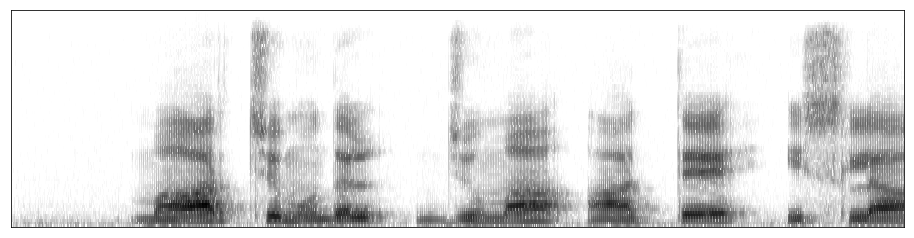

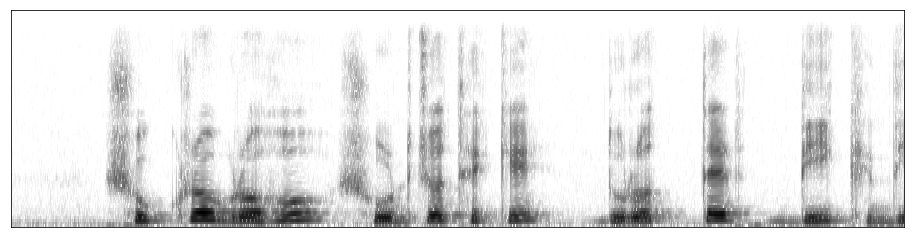

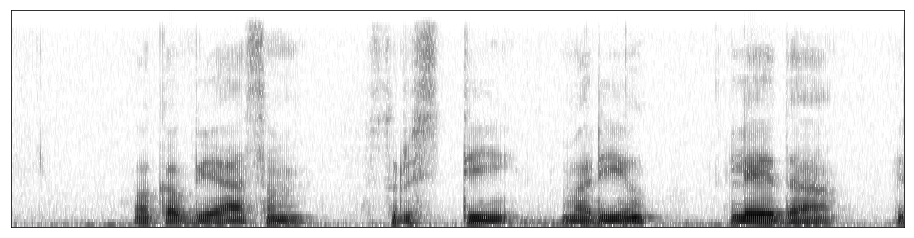

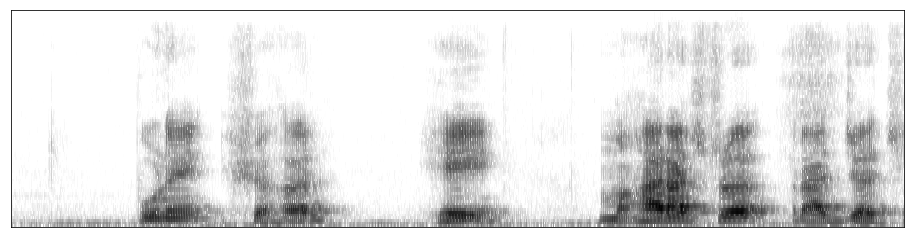

In [0]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib as plot
import matplotlib.pyplot as plt
import os,glob


import imageio
import skimage
from skimage.color import rgb2gray

import csv
import copy
import sys
import pandas as pd

from skimage.feature import local_binary_pattern as lbp
import sys,math,cv2
import time
from collections import Counter
#np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt

path = '/content/'
files = os.listdir(path)
%matplotlib inline
plt.rc('figure', figsize=(16, 4))

for filename in glob.glob(os.path.join(path,'*.wav')):
  
  
  sampling_frequency, wav_data = scipy.io.wavfile.read(filename)
  
  def convert_wav_to_float(data):
      if data.dtype == np.uint8:
          data = (data - 128) / 128.
      elif data.dtype == np.int16:
          data = data / 32768.
      elif data.dtype == np.int32:
          data = data / 2147483648.
      return data

  wav_data = convert_wav_to_float(wav_data)
  n_samples = len(wav_data)
  total_duration = n_samples / sampling_frequency
  sample_times = np.linspace(0, total_duration, n_samples)

  def gaussian_spectrogram(x, fs, window_dur=0.005, step_dur=None, dyn_range=120, 
                           cmap=None, ax=None):
      from scipy.signal import spectrogram, gaussian
      from matplotlib.colors import LogNorm
      from matplotlib.cm import get_cmap

      # set default for step_dur, if unspecified. This value is optimal for Gaussian windows.
      if step_dur is None:
          step_dur = window_dur / np.sqrt(np.pi) / 8.

      # convert window & step durations from seconds to numbers of samples (which is what
      # scipy.signal.spectrogram takes as input).
      window_nsamp = int(window_dur * fs * 2)
      step_nsamp = int(step_dur * fs)

      # make the window. A Gaussian filter needs a minimum of 6s - 1 samples, so working
      # backward from window_nsamp we can calculate s.
      window_sigma = (window_nsamp + 1) / 6
      window = gaussian(window_nsamp, window_sigma)

      # convert step size into number of overlapping samples in adjacent analysis frames
      noverlap = window_nsamp - step_nsamp

      # compute the power spectral density
      freqs, times, power = spectrogram(x, detrend=False, mode='psd', fs=fs,
                                        scaling='density', noverlap=noverlap,
                                        window=window, nperseg=window_nsamp)

      p_ref = 2e-5  # 20 µPa, the standard reference pressure for sound in air

      # set lower bound of colormap (vmin) from dynamic range. The upper bound defaults
      # to the largest value in the spectrogram, so we don't need to set it explicitly.
      dB_max = 10 * np.log10(power.max() / (p_ref ** 2))
      vmin = p_ref * 10 ** ((dB_max - dyn_range) / 10)

      # set default colormap, if none specified
      if cmap is None:
          cmap = get_cmap('Greys')
      # or if cmap is a string, get the actual object
      elif isinstance(cmap, str):
          cmap = get_cmap(cmap)

      # create the figure if needed
      if ax is None:
          fig, ax = plt.subplots()
          

      # other arguments to the figure
      extent = (times.min(), times.max(), freqs.min(), freqs.max())

      # plot
      ax.imshow(power, origin='lower', aspect='auto', cmap=cmap,
                norm=LogNorm(), extent=extent, vmin=vmin, vmax=None)
      return ax

  #ax=plt.subplot(111)  
  ax = gaussian_spectrogram(wav_data, sampling_frequency)
  #ax.set_xlabel('time (s)')
  #ax.set_ylabel('frequency (Hz)');
  plt.yticks([])
  plt.xticks([])
  ax.set_ylim(0, 8000)
  ax.set_xlim(0, 4)
  
  ax.figure.savefig('%s.png' % filename)
  
  img1 = imageio.imread('%s.png' % filename)
  gray = skimage.color.rgb2gray(img1)
  crop_img = gray[36:252, 145:1037]
  
  
  
  def binary_to_decimal(lis):
      dec=(2**3)*lis[3]+(2**2)*lis[2]+(2**1)*lis[1]+(2**0)*lis[0]
      return int(dec)

  def compare(pix,center):
      if pix>=center:
          return 1
      else:
          return 0
  def dec2bin(val):
      l=[int(x) for x in bin(val)[2:]]
      b=[0]*(8-len(l))
      b.extend(l)
      dia=b[0::2]
      st=b[1::2]
      return dia,st

  def getlbp(img): 
      neighbours=8
      counter=0
      h,w=img.shape
      im=np.pad(img,((1,1),(1,1)),mode='constant')
      dia_img=np.zeros((h,w),dtype=np.uint8)
      str_img=np.zeros((h,w),dtype=np.uint8)
      for x in range(1,h+1):
          for y in range(1,w+1):
      #         center=img[i,j]
              dia=[]
              hor=[]
              for counter in range(0,neighbours):
                  if counter == 0:
                      dia.append(compare(im[x-1,y-1], im[x,y]))
                  elif counter == 1:
                      hor.append(compare(im[x,y-1], im[x,y]))
                  elif counter == 2:
                      dia.append(compare(im[x+1,y-1], im[x,y]))
                  elif counter == 3:
                      hor.append(compare(im[x+1,y], im[x,y]))
                  elif counter == 4:
                      dia.append(compare(im[x+1,y+1], im[x,y]))
                  elif counter == 5:
                      hor.append(compare(im[x,y+1], im[x,y]))
                  elif counter == 6:
                      dia.append(compare(im[x-1,y+1], im[x,y]))
                  elif counter == 7:
                      hor.append(compare(im[x-1,y], im[x,y]))
              dia_img[x-1,y-1]=binary_to_decimal(dia)
              str_img[x-1,y-1]=binary_to_decimal(hor)
      return dia_img,str_img                
 

  def get090(arr):
      list0=[]
      list90=[]
      y,x=arr.shape
      for i in range(y):
          for j in range(x):
      #         print(i,j)
              try:
                  list0.append((arr[i][j],arr[i][j+1]))
              except:
                  pass
              try:
      #             print(arr[j,i],arr[j,i+1])
                  list90.append((arr[j][i],arr[j+1][i]))

  #                 print(arr[j,i],arr[j+1,i])

              except:
                  continue
      return list0,list90


  def get45135(arr):
  #     print(np.where(arr==0))
      list45=[]
      list135=[]
      y,x=arr.shape
      for i in range(y):
          for j in range(x):
              try:
                  list135.append((arr[i][j],arr[i+1][j+1]))
              except Exception as e:
                  pass
              try:
                  if (j-1)>=0:
                      list45.append((arr[i][j],arr[i+1][j-1]))

              except Exception as e:
                  pass

      return list45,list135

  def groupandcount(lis):
      lis=[(item[1],item[0]) if item[0]>item[1] else (item[0],item[1]) for item in lis]
  #     print(len(set(lis)))
      counts = dict()
      for i in lis:
        counts[i] = counts.get(i, 0) + 1
      return counts

  def getfeatures(image):
      # t1=time.time()
      im1,im2=getlbp(image)
      # print(time.time()-t1)
      list0,list90=get090(im2)
      a,b=im1.shape
      list45,list135=get45135(im1)
      tot=[]
      tot.extend(list0)
      tot.extend(list45)
      tot.extend(list90)
      tot.extend(list135)
      val=groupandcount(tot)
      bins=[(i,j) for i in range(16) for j in range(16) if i<=j]
      features=['_']*len(bins)
      # print(len(features))
      for idx,i in enumerate(bins):
          # print(idx)
          try:
              features[idx]=val[i]
          except Exception as e:
              features[idx]=0
      return features       
  # print(len(bins))
  # print(sorted(list0,key=lambda x:(x[0],x[1])))
  features = getfeatures(crop_img)
  with open("TAMIL.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(features)


In [0]:
x_test = features

####**Let's drop the redundant features from our data set**

In [0]:
del x_test[135]
del x_test[134]
del x_test[133]
del x_test[132]
del x_test[130]
del x_test[126]
del x_test[125]
del x_test[124]
del x_test[122]
del x_test[120]
del x_test[119]
del x_test[116]
del x_test[115]
del x_test[114]
del x_test[99]
del x_test[97]
del x_test[95]
del x_test[93]
del x_test[91]
del x_test[88]
del x_test[85]
del x_test[81]
del x_test[78]
del x_test[77]
del x_test[75]
del x_test[70]
del x_test[68]
del x_test[65]
del x_test[62]
del x_test[58]
del x_test[53]
del x_test[52]
del x_test[51]
del x_test[50]
del x_test[46]
del x_test[44]
del x_test[42]
del x_test[37]
del x_test[34]
del x_test[33]
del x_test[32]
del x_test[31]
del x_test[26]
del x_test[23]
del x_test[22]
del x_test[18]
del x_test[16]
del x_test[12]
del x_test[11]
del x_test[10]
del x_test[7]
del x_test[5]
del x_test[0]

In [0]:
import numpy as np
a = np.array(x_test)[np.newaxis]
#print(a)
#print(a.T)

####**Here we save our feature vector into a file.csv file**

In [0]:
  #with open("optimized.csv", 'a') as f:
   # writer = csv.writer(f)
    #writer.writerow(x_test)

#import numpy
#numpy.savetxt("opt.csv", a, delimiter=",")

import pandas as pd 
pd.DataFrame(a).to_csv("file.csv", index=None)

####**Loading our prediction dataset**

In [0]:
x_test = pd.read_csv('/content/file.csv')

In [0]:
#x_test

####**Normalizing the data and predicitng the output**

In [0]:
x_test = preprocessing.normalize(x_test)

y_pred= model.predict_classes(x_test)

####**As we have used 4 nodes in our output layer to represent 4 languages while defining our model, we will get our output from 0 to 3.**

In [0]:
if y_pred == 0:
  print("Spoken language is Bengali")
elif y_pred == 1:
  print("Spoken language is Hindi")
elif y_pred == 2:
  print("Spoken language is Marathi")
elif y_pred == 3:
  print("Spoken language is Malayalam")
else:
  print("")

Spoken language is Bengali
